In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# DS -> Supervised | Classification | Confusion metrics |

In [ ]:
df.drop(columns=['id'],inplace=True,axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df = df[df['gender'] != 'Other']
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# split before any data preprocess

from sklearn.model_selection import train_test_split

# Splitting the DataFrame into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Calculate the median of the 'bmi' and 'Fare' columns in the training set
train_median_bmi = train_df['bmi'].median()


# Fill missing values in the training set
train_df['bmi'].fillna(train_median_bmi, inplace=True)


# Fill missing values in the test set using medians from the training set
test_df['bmi'].fillna(train_median_bmi, inplace=True)


In [ ]:
train_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Drop rows where gender is Other from the training data
train_df = train_df[train_df['gender'] != 'Other']
# Columns to one-hot encode
onehot_cols = ['ever_married','Residence_type','work_type','smoking_status','gender']

# Apply one-hot encoding to training set
train_df_onehot = pd.get_dummies(train_df, columns=onehot_cols)

# Apply one-hot encoding to test set
test_df_onehot = pd.get_dummies(test_df, columns=onehot_cols)

In [ ]:
train_df_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
802,79.0,0,0,112.64,28.5,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
3927,62.0,0,0,88.32,36.3,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2337,21.0,0,0,59.52,33.7,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3910,31.0,0,0,65.70,30.4,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
1886,31.0,0,0,59.63,19.9,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
# Scaler -> min max scaler
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
scale_cols = ['age', 'avg_glucose_level','bmi']

# Fit the scaler on the training data and transform both training and test data.
scaler.fit(train_df_onehot[scale_cols])

train_df_onehot[scale_cols] = scaler.transform(train_df_onehot[scale_cols])
test_df_onehot[scale_cols] = scaler.transform(test_df_onehot[scale_cols])


In [ ]:
train_df_onehot

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
802,0.963379,0,0,0.265534,0.208477,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
3927,0.755859,0,0,0.153264,0.297824,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2337,0.255371,0,0,0.020312,0.268041,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3910,0.377441,0,0,0.048841,0.230241,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
1886,0.377441,0,0,0.020820,0.109966,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,0.743652,0,0,0.410950,0.223368,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
466,0.743652,1,0,0.530560,0.571592,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0
3092,0.013184,0,0,0.194627,0.085911,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
3773,0.462891,0,0,0.179162,0.128293,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
X_train = train_df_onehot.drop('stroke',axis=1)
y_train = train_df_onehot['stroke']

X_test = test_df_onehot.drop('stroke',axis=1)
y_test = test_df_onehot['stroke']

In [ ]:
# Build model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [ ]:
logistic_model = LogisticRegression()
svc_model = SVC()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()


In [ ]:
logistic_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred_logistic = logistic_model.predict(X_test)
y_pred_svc = svc_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)


In [ ]:
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

# Print the confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_logistic)
print("\nConfusion Matrix for Support Vector Classifier:")
print(confusion_matrix_svc)
print("\nConfusion Matrix for Decision Tree Classifier:")
print(confusion_matrix_decision_tree)
print("\nConfusion Matrix for KNN Classifier:")
print(confusion_matrix_knn)
print("\nConfusion Matrix for Naive Bayes:")
print(confusion_matrix_naive_bayes)


Confusion Matrix for Logistic Regression:
[[960   0]
 [ 62   0]]

Confusion Matrix for Support Vector Classifier:
[[960   0]
 [ 62   0]]

Confusion Matrix for Decision Tree Classifier:
[[923  37]
 [ 53   9]]

Confusion Matrix for KNN Classifier:
[[957   3]
 [ 60   2]]

Confusion Matrix for Naive Bayes:
[[302 658]
 [  0  62]]


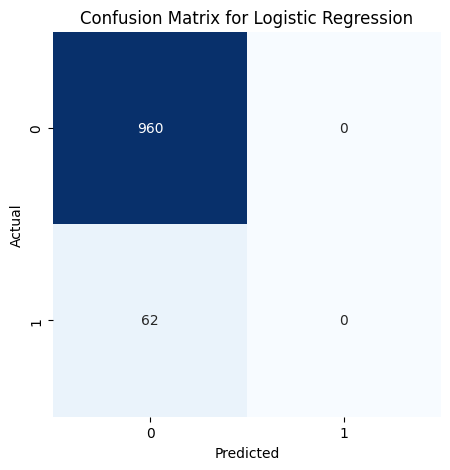

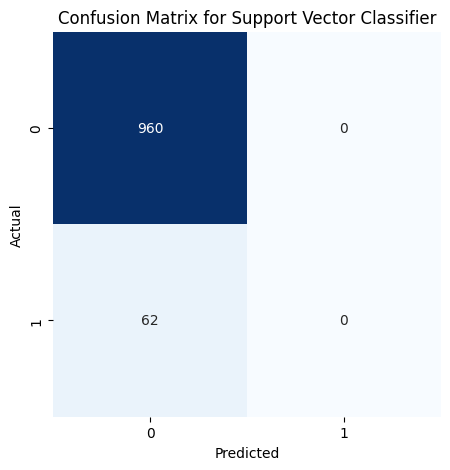

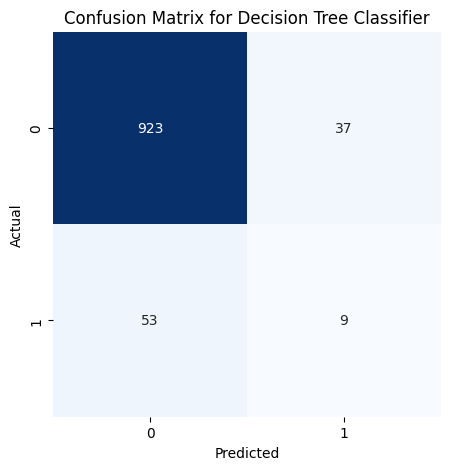

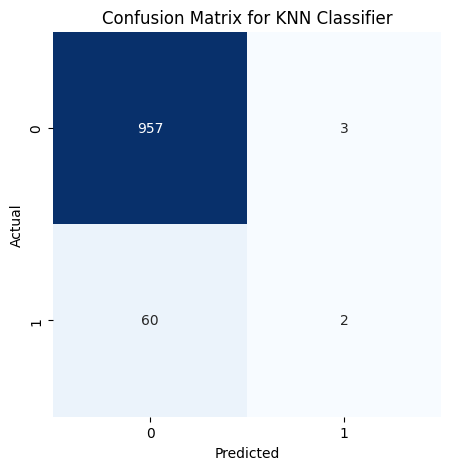

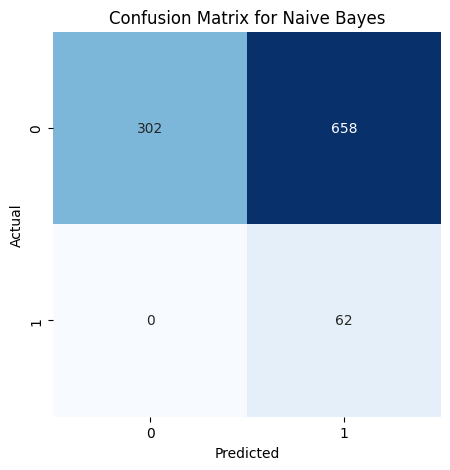

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot the confusion matrices
plot_confusion_matrix(confusion_matrix_logistic, "Confusion Matrix for Logistic Regression")
plot_confusion_matrix(confusion_matrix_svc, "Confusion Matrix for Support Vector Classifier")
plot_confusion_matrix(confusion_matrix_decision_tree, "Confusion Matrix for Decision Tree Classifier")
plot_confusion_matrix(confusion_matrix_knn, "Confusion Matrix for KNN Classifier")
plot_confusion_matrix(confusion_matrix_naive_bayes, "Confusion Matrix for Naive Bayes")

In [ ]:
log_acc = logistic_model.score(X_test, y_test)
knn_acc = knn_model.score(X_test, y_test)
dec_acc = decision_tree_model.score(X_test, y_test)
svc_acc = svc_model.score(X_test, y_test)
nb_acc=naive_bayes_model.score(X_test, y_test)


In [ ]:
print("Logistic Regression Accuracy:", log_acc)
print("K-Nearest-Neighbors Accuracy:", knn_acc)
print("Decision Tree Accuracy:", dec_acc)
print("Naive bayes Accuracy:", nb_acc)
print("Support Vector classifier Accuracy:", svc_acc)

Logistic Regression Accuracy: 0.9393346379647749
K-Nearest-Neighbors Accuracy: 0.9383561643835616
Decision Tree Accuracy: 0.9119373776908023
Naive bayes Accuracy: 0.3561643835616438
Support Vector classifier Accuracy: 0.9393346379647749


In [ ]:
import plotly.express as px
fig = px.bar(
    x=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree", "Naive bayes", "Support Vector classifier"],
    y=[log_acc, knn_acc, dec_acc, nb_acc, svc_acc],
    color=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree", "Naive bayes", "Support Vector classifier"],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Model Accuracy Comparison"
)

fig.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create a dictionary containing all the candidate values of the hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Type of kernel
    'degree': [2, 3, 4],  # Degree for poly kernels
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}


# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the model for grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best estimator
best_model = grid_search.best_estimator_

# Now you can use best_model to make predictions


Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9547351063734277


In [ ]:

# Calculate the median of the 'bmi' and 'Fare' columns in the training set
median_bmi = df['bmi'].median()


# Fill missing values in the training set
df['bmi'].fillna(median_bmi, inplace=True)


# Fill missing values in the test set using medians from the training set
df['bmi'].fillna(median_bmi, inplace=True)

# Drop rows where gender is Other from the training data
df = df[df['gender'] != 'Other']
# Columns to one-hot encode
onehot_cols = ['ever_married','Residence_type','work_type','smoking_status','gender']

# Apply one-hot encoding to training set
df_onehot = pd.get_dummies(df, columns=onehot_cols)






In [ ]:

# Scaler -> min max scaler
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
scale_cols = ['age', 'avg_glucose_level','bmi']

# Fit the scaler on the training data and transform both training and test data.
scaler.fit(df_onehot[scale_cols])

df_onehot[scale_cols] = scaler.transform(df_onehot[scale_cols])



In [ ]:
df_onehot

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
0,0.816895,0,1,0.801265,0.301260,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1,0.743652,0,0,0.679023,0.203895,1,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0.975586,0,1,0.234512,0.254296,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0.597168,0,0,0.536008,0.276060,1,0,1,0,1,...,0,1,0,0,0,0,0,1,1,0
4,0.963379,1,0,0.549349,0.156930,1,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1,0,0.132167,0.203895,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
5106,0.987793,0,0,0.323516,0.340206,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
5107,0.426270,0,0,0.128658,0.232532,0,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
5108,0.621582,0,0,0.513203,0.175258,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
X = train_df_onehot.drop('stroke',axis=1)
y = train_df_onehot['stroke']



In [ ]:
svc_model = SVC(C=10, degree=2,gamma='scale',kernel= 'rbf')
svc_model.fit(X, y)

SVC(C=10, degree=2)